In [10]:
#Imports
%matplotlib notebook

import sys
import math

import numpy as np    
import pandas as pd
             
import matplotlib.pyplot as plt

from sklearn import linear_model

#import statsmodels.regression.linear_model as sm

#import matplotlib.pyplot as plt
#import seaborn as sns

#sns.set_palette("colorblind")
#color_blind_list = sns.color_palette("colorblind", 8)

In [ ]:
Récupérer les données du fichier https://bitbucket.org/portierf/shared_files/downloads/
Galton.txt (voir aussi leur description ici http://www.randomservices.org/random/
data/Galton.html) et charger les avec Pandas.

In [9]:
df = pd.read_csv("Galton.txt", sep='\t')
#                 na_values=na_values, 
#                 usecols=columns,)

df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


<IPython.core.display.Javascript object>


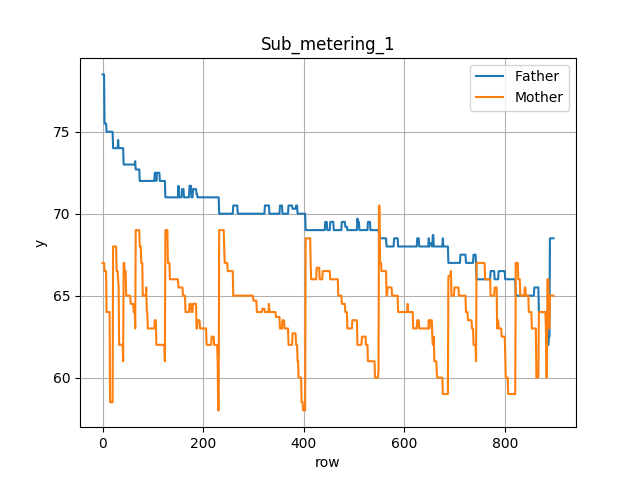

In [11]:
fig = plt.figure()
plt.grid(True)

plt.title("Sub_metering_1")
plt.xlabel("row")
plt.ylabel("y")

plt.plot(df.index, df['Father'], label='Father')
plt.plot(df.index, df['Mother'], label='Mother')

plt.legend(loc='upper right');

plt.show()

2 Créer une colonne supplémentaire appelée “MeanParents” qui contient la taille du parent “moyen”, c’est-à-dire $\frac{1}{2} (taille(pere) + 1.08 taille(mere))$. 
Pour plus d’explication sur cette transformation, on pourra consulter :
`https://17art.ru/fr/calculator-of-the-ratio-of-height-and-weight-of-the-child-calculate-the-final-growth-of-the-child/`

On note $x_i$ la taille du parent moyen pour la famille $i$ et $y_i$ la taille de l’enfant.
On écrit $y_i =  theta_1 x_i + \theta_0 + \varepsilon i$ et on modélise les variables ε i comme centrées, indépendantes de même variance $\sigma^2$ inconnue.


In [12]:
df["MeanParents"] = 0.5 * (df["Father"] + 1.08 * df["Mother"])

df.head()

,Family,Father,Mother,Gender,Height,Kids,MeanParents
0,1,78.5,67.0,M,73.2,4,75.43
1,1,78.5,67.0,F,69.2,4,75.43
2,1,78.5,67.0,F,69.0,4,75.43
3,1,78.5,67.0,F,69.0,4,75.43
4,2,75.5,66.5,M,73.5,4,73.66


<IPython.core.display.Javascript object>


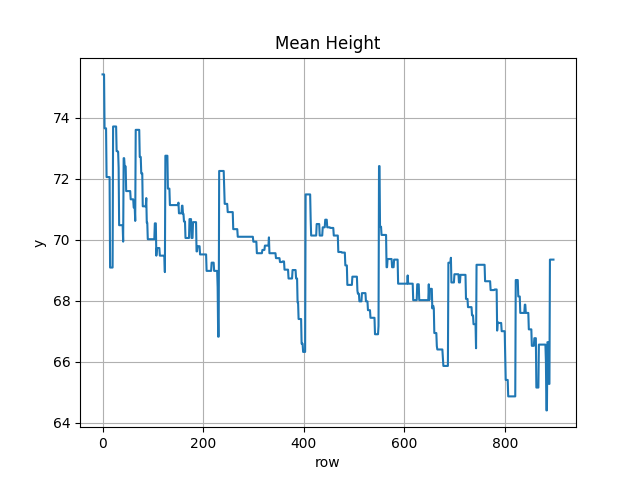

In [70]:
fig = plt.figure()
plt.grid(True)

plt.title("Mean Height")
plt.xlabel("row")
plt.ylabel("y")

plt.plot(df.index, df['MeanParents'])

plt.show()

<IPython.core.display.Javascript object>


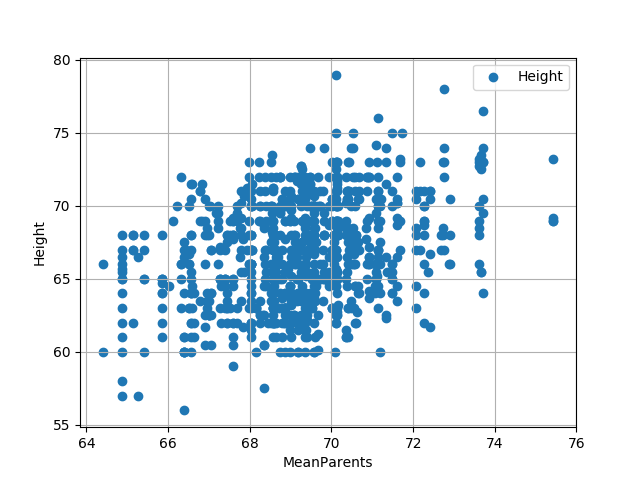

In [17]:
fig = plt.figure()
plt.grid(True)

plt.title("")
plt.xlabel("MeanParents")
plt.ylabel("Height")

plt.scatter(df['MeanParents'], df['Height'])

plt.legend(loc='upper right');

plt.show()

https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html



4 - Estimer $\theta_0$, $\theta_1$ , par $\hat{\theta}_0$ , $\hat{\theta}_1$ en utilisant la fonction  `LinearRegression` de `sklearn`.
Calculer et visualiser les valeurs prédites $\hat{y}_i = \theta_1 x_i + \theta_0$ et $y_i$ sur un même graphique.

In [40]:
from sklearn import linear_model

X = df["MeanParents"].values.reshape(-1, 1)
y = df["Height"].values.reshape(-1, 1)

print("shape(X.shape = {}".format(X.shape))
print("shape(y) = {}".format(y.shape))
reg = linear_model.LinearRegression().fit(X, y)

print("{}".format(reg.coef_))

print("{}".format(reg.intercept_))


shape(X.shape = (898, 1)
shape(y) = (898, 1)
[[ 0.64119038]]
[ 22.37620568]


<IPython.core.display.Javascript object>


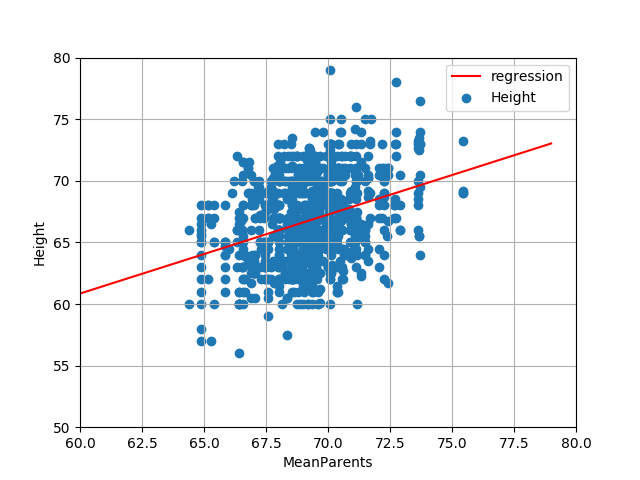

In [45]:
#x1 = np.arange(0., 80., 1)
#y1 = x1 * reg.coef_[0][0] + reg.intercept_[0]
pred = reg.predict(X)

fig = plt.figure()
plt.grid(True)

plt.title("")
plt.xlabel("MeanParents")
plt.ylabel("Height")

# Zoom
plt.xlim(60, 80)
plt.ylim(50, 80)

plt.scatter(df['MeanParents'], df['Height'])
plt.plot(X, pred, label='regression', color='red')

plt.legend(loc='upper right')

plt.show()

5 - Vérifier la formule vue en cours liée au recentrage des données. On centrera les données et on vérifiera que la prédiction effectuée dans le modèle centré est bien la même que celle effectuée précédemment. Justifiez votre réponse. On pourra définir $y_{i,c}$ et $x_{i,c}$ comme étant les variables centrées et calculer

<IPython.core.display.Javascript object>


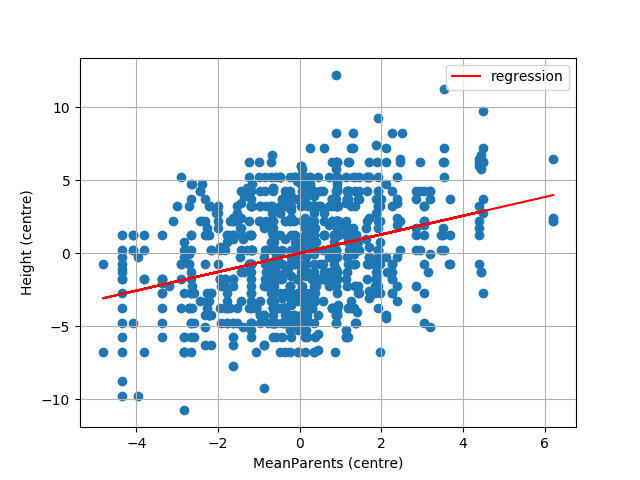

In [54]:
X_mean = X.mean()
y_mean = y.mean()

X_c = X - X_mean
y_c = y - y_mean

reg_c = linear_model.LinearRegression(fit_intercept = False).fit(X_c, y_c)

pred_c = reg_c.predict(X_c)

fig = plt.figure()
plt.grid(True)

plt.title("")
plt.xlabel("MeanParents (centre)")
plt.ylabel("Height (centre)")

# Zoom
#plt.xlim(60, 80)
#plt.ylim(50, 80)

plt.scatter(X_c, y_c)
#plt.plot(x2, y2, label='regression', color='red')
plt.plot(X_c, pred_c, label='regression', color='red')

plt.legend(loc='upper right')

plt.show()

Centré:
$\tilde{Y} = \tilde{X} \tilde{\theta}$

$Y - \bar{Y} = (X - \bar{X} ) \tilde{\theta}$

$Y = (\bar{Y} - \bar{X} \tilde{\theta}) + X \tilde{\theta}$  vs. $Y = \theta_0 + X \theta_1$

In [65]:

theta_0 = reg.intercept_[0]
theta_1 = reg.coef_[0][0]

# centered mode
print(reg_c.intercept_, reg_c.coef_)

beta_1 = reg_c.coef_[0][0]
beta_0 = y_mean - X_mean * beta_1

print("intercept: {} => {}".format(theta_0, beta_0))
print("coef: {} => {}".format(theta_1, beta_1))    

y_pred_c = beta_1 * X + (y_mean - X_mean * beta_1)
y_pred  = theta_1 * X + theta_0

np.allclose(y_pred_c, y_pred)

0.0 [[ 0.64119038]]
intercept: 22.37620568300428 => 22.37620568300428
coef: 0.6411903795908166 => 0.6411903795908166


True

On constate que les coefficients sont identiques.
D'autre part on peut aussi verifier l'équivalent des predictions.

In [ ]:
y1 = X * beta

6 - Visualiser l’histogramme des résidus $r_i = y_i − \hat{y}_i$ ($\hat{y}_i$ est la valeur prédite par le modèle). L’hypothèse de normalité est-elle crédible ?

<IPython.core.display.Javascript object>


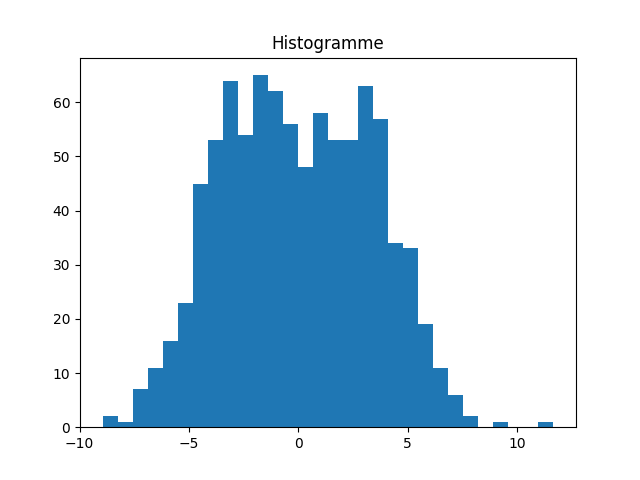

In [85]:
r_c = y_c - pred_c

fig = plt.figure()

plt.title("Histogramme")

plt.hist(r_c, bins=30)
plt.show()

Distribution bi-modale

7 - Sur un graphique similaire à celui de la question 3, sur lequel apparait le nuage de points et la droite de régression, distinguer (à l’aide de deux couleurs différentes) les filles des garçons. Expliquer la forme de la distribution des résidus observée à la question précédente.

<IPython.core.display.Javascript object>


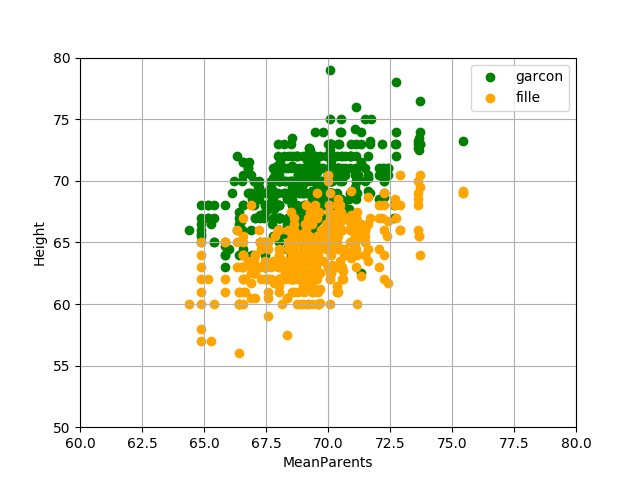

In [78]:
df_g = df[df["Gender"] == 'M'].copy()
df_f = df[df["Gender"] == 'F'].copy()

df_g.head()

df_g["MeanParents"] = 0.5 * (df_g["Father"] + 1.08 * df_g["Mother"])
df_f["MeanParents"] = 0.5 * (df_f["Father"] + 1.08 * df_f["Mother"])

fig = plt.figure()
plt.grid(True)

plt.title("")
plt.xlabel("MeanParents")
plt.ylabel("Height")

# Zoom
plt.xlim(60, 80)
plt.ylim(50, 80)

plt.scatter(df_g['MeanParents'], df_g['Height'], label='garcon', color='green')
plt.scatter(df_f['MeanParents'], df_f['Height'], label='fille', color='orange')
#plt.plot(X, pred, label='regression', color='red')

plt.legend(loc='upper right')

plt.show()


On remarque que deux groupes distincts, les garcons et les filles. 
On peut voir que le groupe des garcons est en moyenne plus grand que le groupe des filles 
quelque soit la taille moyenne des parents.
Cela explique la structure bi-modale de l'histogramme, 
et suggère de faire deux modèles differents, un pour les filles et un pour les garcons.

8 - Effectuer une régression sur le groupe des garçons uniquement. Représenter cette droite de régression sur le graphique de la question précédente. Représenter la distribution des résidus obtenue sur ce modèle. Commenter.

[[ 0.64119038]]
[ 22.37620568]


<IPython.core.display.Javascript object>


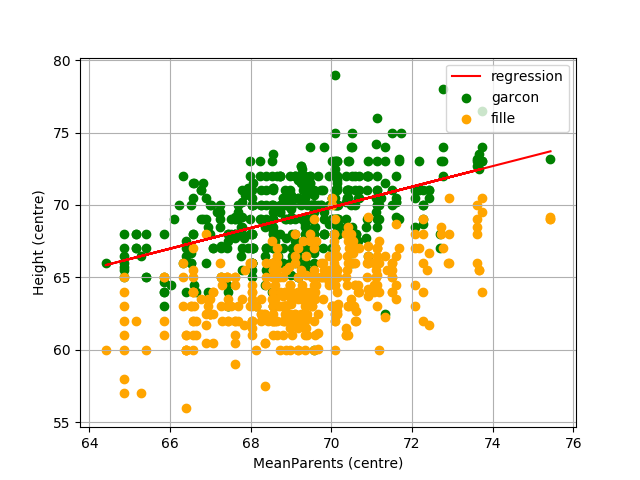

In [82]:

X_g = df_g["MeanParents"].values.reshape(-1, 1)
y_g = df_g["Height"].values.reshape(-1, 1)

reg_g = linear_model.LinearRegression().fit(X_g, y_g)

print("{}".format(reg.coef_))
print("{}".format(reg.intercept_))

pred_g = reg_g.predict(X_g)

fig = plt.figure()
plt.grid(True)

plt.title("")
plt.xlabel("MeanParents (centre)")
plt.ylabel("Height (centre)")



plt.scatter(df_g['MeanParents'], df_g['Height'], label='garcon', color='green')
plt.scatter(df_f['MeanParents'], df_f['Height'], label='fille', color='orange')
plt.plot(X_g, pred_g, label='regression', color='red')

plt.legend(loc='upper right')

plt.show()

<IPython.core.display.Javascript object>


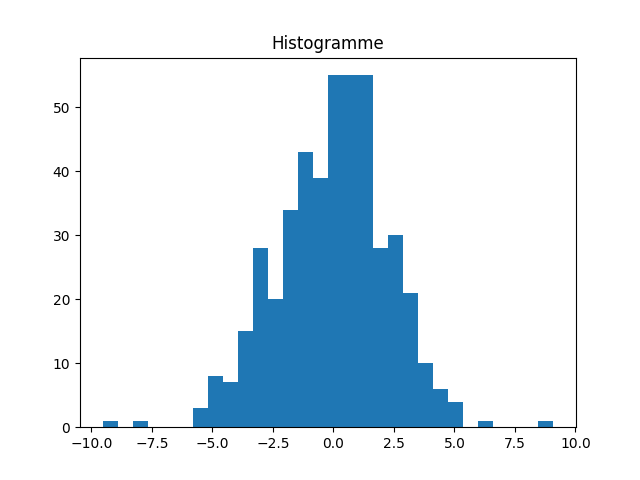

In [84]:
r_g = y_g - pred_g

fig = plt.figure()

plt.title("Histogramme")

plt.hist(r_g, bins=30)
plt.show()

9 - A l’aide d’un partitionnement aléatoire de l’échantillon, construire un échantillon de test et un échantillon d’apprentissage.
L’échantillon test doit contenir 20% des données.
On estimera, sur l’échantillon d’apprentissage deux modèles : un premier modèle basé uniquement sur les garçons, et un deuxième modèle basé sur l’échantillon complet.
On comparera les deux prédicteurs sur le groupe “garçon” de l’échantillon test en calculant le risque de prédiction :

\begin{equation}
\frac{1}{|\mbox{test|}} (y_i − \hat{y}_i )^2 ,
\end{equation}

$\hat{y}$ est la valeur prédite par le modèle.


10 - Construire à la main un prédicteur qui combine le prédicteur linéaire appris sur les filles
avec celui appris sur les garçons.

11 - En utilisant, un encodage booléen de la variable GENDER construire le même prédicteur
que précédement. Calculer, "à la main", son coefficient de determination. On comparera ce
dernier au coefficient de determination du modèle avec seulement la variable MeanParents.

12 - Faire une régression avec les 2 variables explicatives suivantes : la taille du père et de la mère. Faire un graphique (en 3 dimensions) qui représente le nuage de point et le plan de
régression. Visualiser la distribution des résidus.

13 - A l’aide d’un échantillon test (construit comme précédemment), comparer la performance
du modèle précédent à celle du modèle contenant seulement la variable MeanParents. Commenter.